## Visualizations for the HMMs

In [6]:
import os
import numpy as np
from IPython.display import HTML

from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    sample_sentence,
    visualize_sparsities,
    animate_emission
)
import random

import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/hannahfan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     /Users/hannahfan/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [9]:
# Load the data
filename = 'data/shakespeare.txt'
filename_2 = 'data/spenser.txt'

with open(filename, 'r') as f:
    with open(filename_2, 'r') as f2:
        content = f.readlines() + f2.readlines()
        lines = []
        for line in content:
            line = line.strip(',')
            if len(line) > 23:
                words = (line.split('\n')[0].split(' '))
                while '' in words : words.remove('')
                newWords = []
                for w in words:
                    w = w.strip(' ,.:;?!\'()').lower()
                    newWords.append(w)
                lines.append(newWords)

obs, obs_map = parse_observations(lines)

# Syllable data
with open('data/Syllable_dictionary.txt', 'r') as syl_f:
    syl_content = syl_f.readlines()
word_to_syl = {}
for l in syl_content:
    spl = l.split()
    if len(spl) == 3 and (spl[2] == 'E3' or spl[2] == 'E4'):
        word_to_syl[spl[0]] = spl[1]
    else:
        word_to_syl[spl[0]] = spl[len(spl)-1]
syllables = []
for l in lines:
    syl_line = []
    for w in l:
        if w in word_to_syl.keys():
            syl_line.append(int(word_to_syl.get(w)))
        else:
            new_w = "\'" + w
            if new_w in word_to_syl.keys():
                syl_line.append(int(word_to_syl.get(new_w)))
            else:
                syl_line.append(0)
    syllables.append(syl_line)

# Part of speech data
parts_of_speech = []
pos_map = {}
pos_counter = 0
for l in lines:
    pos_line = []
    for w in l:
        pos = nltk.pos_tag([w])[0][1]
        if pos not in pos_map:
            pos_map[pos] = pos_counter
            pos_counter += 1
        
        pos_line.append(pos_map[pos])
    
    parts_of_speech.append(pos_line)

# Initialize a 2D dictionary for syllables and parts of speech
syl_pos_dict = dict()
for d in range(6): 
    syl_pos_dict[d] = dict()
    
for l in syl_content:
    spl = l.split()
    v = spl[0]
    pos = pos_map[nltk.pos_tag([v])[0][1]]
    
    # emphasis handling
    if len(spl) == 3 and (spl[2] == 'E3' or spl[2] == 'E4'):
        k = int(spl[1])
    else:
        k = int(spl[len(spl)-1])
    
    if pos in syl_pos_dict[k].keys():
        syl_pos_dict[k][pos].append(obs_map[v.strip('\'')])
    else:
        syl_pos_dict[k][pos] = [obs_map[v.strip('\'')]]

In [8]:
def parse_observations(lines):
    obs_counter = 0
    obs = []
    obs_map = {}

    for line in lines:
        obs_elem = []
        
        for word in line:
            if word not in obs_map:
                # Add unique words to the observations map.
                obs_map[word] = obs_counter
                obs_counter += 1
            
            # Add the encoded word.
            obs_elem.append(obs_map[word])
        
        # Add the encoded sequence.
        obs.append(obs_elem)

    return obs, obs_map

In [24]:
obs, obs_map = parse_observations(lines)

In [25]:
hmm_words = unsupervised_HMM(obs, 5, 80)

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80


In [26]:
hmm_pos = unsupervised_HMM(parts_of_speech, 5, 80)

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80


In [27]:
hmm_syls = unsupervised_HMM(syllables, 5, 80)

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80


### Wordcloud of the whole text:

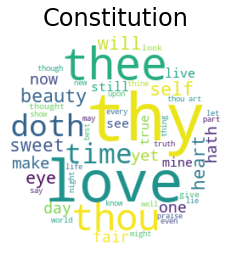

In [28]:
text = open(os.path.join(os.getcwd(), 'data/shakespeare.txt')).read()
wordcloud = text_to_wordcloud(text, title='Constitution')

### Visualizations of the sparsities of A and O for each HMM

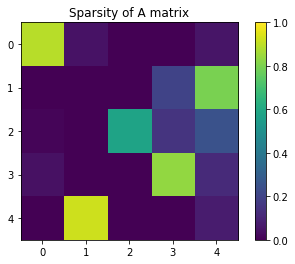

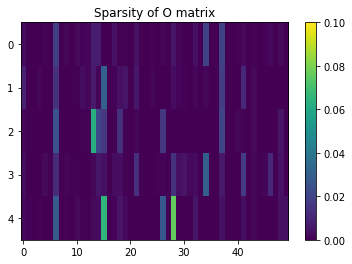

In [29]:
visualize_sparsities(hmm_words, O_max_cols=50)

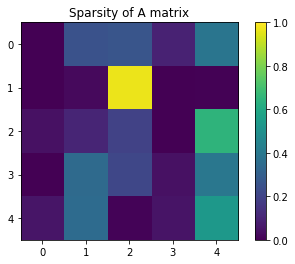

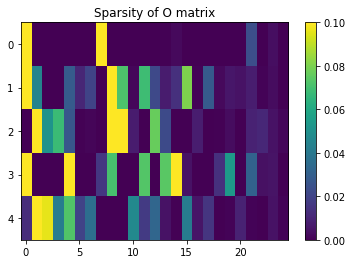

In [30]:
visualize_sparsities(hmm_pos, O_max_cols=50)

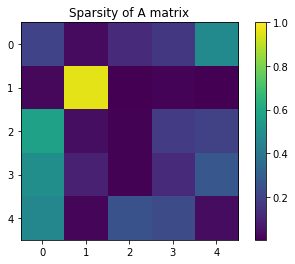

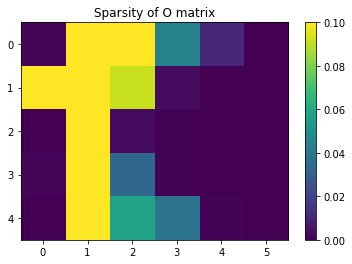

In [31]:
visualize_sparsities(hmm_syls, O_max_cols=50)

### Visualizing the wordcloud of each state

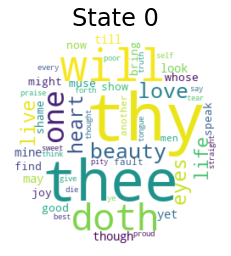

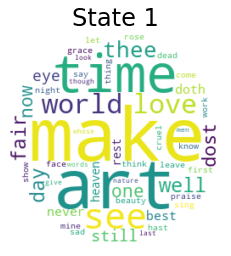

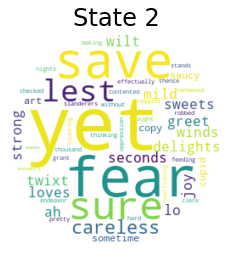

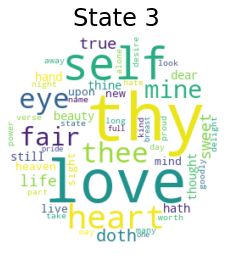

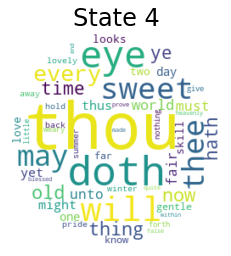

In [33]:
states_to_wordclouds(hmm_words, obs_map)

### Visualizing the process of an HMM generating an emission


Animating...


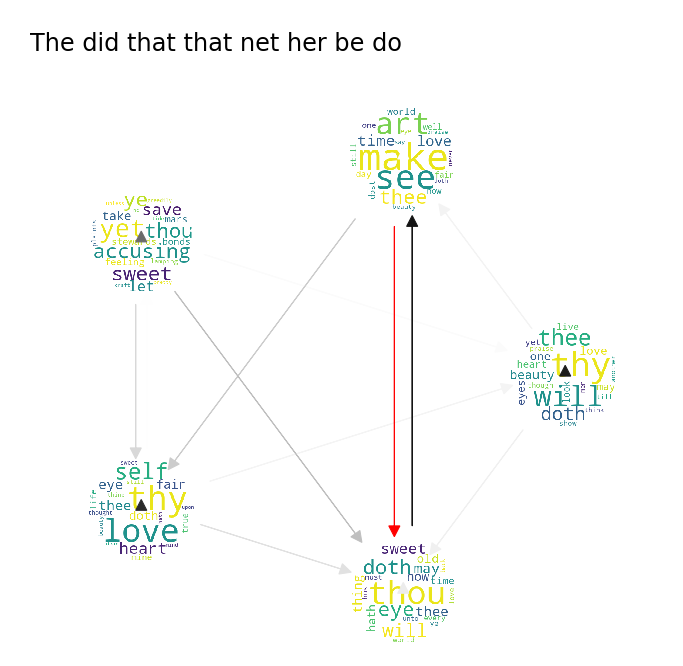

In [35]:
anim = animate_emission(hmm_words, obs_map, M=8)
HTML(anim.to_html5_video())